In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
# %matplotlib inline
pn.extension("plotly")
from alpha_vantage.timeseries import TimeSeries
import pandas_datareader.data as web
import datetime as datetime
import numpy as np
from bokeh.plotting import figure

In [39]:
Health_care_df = web.DataReader(["UNH","JNJ","MRK", "ABBV", "ABT","AAPL"],start='2019-08-16',end='2020-08-25',data_source='yahoo')['Adj Close']

In [40]:
Health_care_df.reset_index(inplace=True)

In [41]:
Health_care_df

Symbols,Date,UNH,JNJ,MRK,ABBV,ABT,AAPL
0,2019-08-16,241.509521,126.934807,82.578949,60.105961,83.407936,204.471252
1,2019-08-19,240.546204,127.794823,83.675987,62.093006,84.175308,208.283447
2,2019-08-20,236.073608,126.200424,83.151749,61.953091,83.171829,208.293350
3,2019-08-21,236.260376,127.099083,84.374992,63.007248,83.526001,210.550949
4,2019-08-22,228.976456,126.847839,84.190536,62.988586,83.004578,210.372726
...,...,...,...,...,...,...,...
253,2020-08-18,316.809998,149.097641,84.559998,95.650002,100.959999,462.250000
254,2020-08-19,315.399994,149.395660,85.029999,96.099998,100.480003,462.829987
255,2020-08-20,313.329987,150.418854,85.029999,95.199997,101.629997,473.100006
256,2020-08-21,314.140015,151.749985,84.980003,94.860001,102.400002,497.480011


In [42]:
aapl_dates = Health_care_df["Date"]
aapl= Health_care_df["AAPL"]

In [43]:
import numpy as np

from bokeh.plotting import figure, output_file, show


# prepare some data
aapl = np.array(Health_care_df["AAPL"])
aapl_dates = np.array(Health_care_df["AAPL"], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
output_file("stocks.html", title="stocks.py example")

In [44]:
aapl_avg = Health_care_df["AAPL"].pct_change()
# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=350, x_axis_type="datetime")

# add renderers
p.circle(Health_care_df["Date"], Health_care_df["AAPL"], size=4, color='darkgrey', alpha=0.2, legend_label='close')
p.line(Health_care_df["Date"], aapl_avg, color='navy', legend_label='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "darkseagreen"
p.ygrid.band_fill_alpha = 0.3

# show the results
show(p)

In [45]:
h

NameError: name 'h' is not defined

In [46]:
Covid_df = pd.read_csv("../covid-19-data//us.csv")
Covid_df = Covid_df.reset_index().set_index("date").drop(columns="index")

In [47]:
Covid_df.tail()

,cases,deaths
date,,
2020-08-11,5154648,164468
2020-08-12,5208835,165946
2020-08-13,5262791,167165
2020-08-14,5322232,168335
2020-08-15,5372567,169394


In [48]:
Health_care_df.head()

Symbols,Date,UNH,JNJ,MRK,ABBV,ABT,AAPL
0,2019-08-16,241.509521,126.934807,82.578949,60.105961,83.407936,204.471252
1,2019-08-19,240.546204,127.794823,83.675987,62.093006,84.175308,208.283447
2,2019-08-20,236.073608,126.200424,83.151749,61.953091,83.171829,208.293350
3,2019-08-21,236.260376,127.099083,84.374992,63.007248,83.526001,210.550949
4,2019-08-22,228.976456,126.847839,84.190536,62.988586,83.004578,210.372726


In [49]:
covid_pct_change = Covid_df.pct_change()

In [50]:
health_pct_change = Health_care_df.pct_change()

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [51]:
len(covid_pct_change)

208

In [52]:
a.mean()

NameError: name 'a' is not defined

In [53]:
health_pct_change.mean()

NameError: name 'health_pct_change' is not defined

In [54]:
covid_pct_change.head()

,cases,deaths
date,,
2020-01-21,NaN,NaN
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,1.0,NaN
2020-01-25,0.5,NaN


In [55]:
a = covid_pct_change["2020-01-28":"2020-04-30"].drop(columns="deaths")


In [56]:
a

,cases
date,
2020-01-28,0.000000
2020-01-29,0.000000
2020-01-30,0.200000
2020-01-31,0.166667
2020-02-01,0.142857
...,...
2020-04-26,0.028315
2020-04-27,0.023884
2020-04-28,0.024780


In [57]:
Health_care_df = web.DataReader(["UNH","JNJ","MRK", "ABBV", "ABT","XLV"],start='2019-08-16',end='2020-08-25',data_source='yahoo')['Adj Close']

In [58]:
Health_care_df.head()

Symbols,UNH,JNJ,MRK,ABBV,ABT,XLV
Date,,,,,,
2019-08-16,241.509521,126.934807,82.578949,60.105961,83.407936,88.417343
2019-08-19,240.546204,127.794823,83.675987,62.093006,84.175308,89.266838
2019-08-20,236.073608,126.200424,83.151749,61.953091,83.171829,88.505219
2019-08-21,236.260376,127.099083,84.374992,63.007248,83.526001,89.159439
2019-08-22,228.976456,126.847839,84.190536,62.988586,83.004578,88.720032


In [59]:
health_pct_change = Health_care_df.pct_change()

In [60]:
 h = health_pct_change.hvplot()

In [61]:
cumm = (1 + health_pct_change).cumprod() 

In [62]:
a = cumm.hvplot()

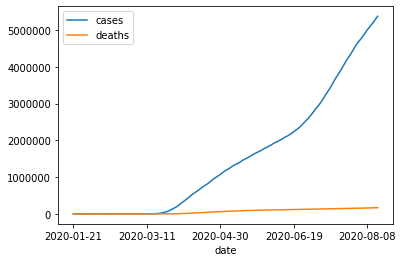

In [63]:
k = Covid_df.plot()
plt.show()

In [64]:
a + h

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [65]:
dropped_deaths = covid_df.drop(columns="deaths")

NameError: name 'covid_df' is not defined

In [66]:
a

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [67]:
covid_pct_change.drop(columns="deaths", inplace=True)

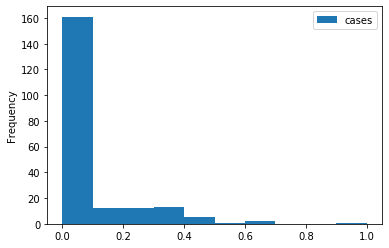

In [68]:
covid_pct_change.plot.hist()

In [69]:
c = pd.concat([Covid_df, Health_care_df], axis=1)

In [70]:
c

,cases,deaths,UNH,JNJ,MRK,ABBV,ABT,XLV
2020-01-21,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-08-18 00:00:00,NaN,NaN,316.809998,149.097641,84.559998,95.650002,100.959999,107.400002
2020-08-19 00:00:00,NaN,NaN,315.399994,149.395660,85.029999,96.099998,100.480003,107.050003
2020-08-20 00:00:00,NaN,NaN,313.329987,150.418854,85.029999,95.199997,101.629997,106.709999
2020-08-21 00:00:00,NaN,NaN,314.140015,151.749985,84.980003,94.860001,102.400002,106.820000


In [ ]:
pct = Health_care_df.pct_change()

In [ ]:
h = pd.concat([covid_pct_change,pct], axis=1)


In [ ]:
s = health_pct_change["2020-01-21":"2020-08-15"]


In [ ]:
pd.concat([s,Covid_df], axis=1)